# A very simple interval neural network implementation in pytorch

See paper:

[Efficient Training of Interval Neural Networks for Imprecise Training Data](https://doi.org/10.1016/j.neunet.2019.07.005). [Sadeghi, Jonathan](JCSadeghi.github.io), [de Angelis, Marco](https://www.liverpool.ac.uk/risk-and-uncertainty/staff/marcodeangelis/), and [Patelli, Edoardo](https://www.liverpool.ac.uk/engineering/staff/edoardo-patelli/). *Neural Networks*. 2019. doi: 10.1016/j.neunet.2019.07.005


Firstly:
`pip install -r requirements.txt` in python 3.7

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

In [2]:
# Hyper-parameters
num_epochs = 200
batch_size = 20

In [3]:
# Toy dataset
x_train = np.expand_dims(np.arange(0, 1, 0.005), -1)
y_train = np.tanh(3 * x_train) + 0.1 * np.random.rand(x_train.shape[0], 1)
dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_train).float(),
                                         torch.from_numpy(y_train).float())
dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

In [4]:
class Model(torch.nn.Module):
    def __init__(self, n_hidden):
        super().__init__()
        self.linear_1 = nn.Linear(1, n_hidden)
        self.linear_2 = nn.Linear(n_hidden, 1)
        self.h = torch.nn.Parameter(torch.Tensor([1.0]))

    def forward(self, x):
        return self.linear_2(torch.nn.functional.tanh(self.linear_1(x)))

In [5]:
model = Model(10)

# Loss and optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [6]:
error_log = []

# Train the model
for epoch in range(num_epochs):
    batch_error_log = []
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        max_error = torch.max(torch.abs(outputs - targets))
        batch_error_log.append(max_error.detach().numpy())
        loss = (model.h - max_error) ** 2 + max_error

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    error_log.append(np.array(batch_error_log).mean())

    if (epoch + 1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(
            epoch + 1,
            num_epochs,
            np.array(batch_error_log).mean()
        ))


/Users/jonathan/simple-interval-neural-net-pytorch/venv/lib/python3.7/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [5/200], Loss: 0.3576
Epoch [10/200], Loss: 0.2046
Epoch [15/200], Loss: 0.2099
Epoch [20/200], Loss: 0.1871
Epoch [25/200], Loss: 0.1758
Epoch [30/200], Loss: 0.1316
Epoch [35/200], Loss: 0.1305
Epoch [40/200], Loss: 0.0816
Epoch [45/200], Loss: 0.0648
Epoch [50/200], Loss: 0.0701
Epoch [55/200], Loss: 0.0764
Epoch [60/200], Loss: 0.0519
Epoch [65/200], Loss: 0.0602
Epoch [70/200], Loss: 0.0653
Epoch [75/200], Loss: 0.0604
Epoch [80/200], Loss: 0.0515
Epoch [85/200], Loss: 0.0634
Epoch [90/200], Loss: 0.0539
Epoch [95/200], Loss: 0.0574
Epoch [100/200], Loss: 0.0732
Epoch [105/200], Loss: 0.0565
Epoch [110/200], Loss: 0.0588
Epoch [115/200], Loss: 0.0578
Epoch [120/200], Loss: 0.0761
Epoch [125/200], Loss: 0.0563
Epoch [130/200], Loss: 0.0537
Epoch [135/200], Loss: 0.0603
Epoch [140/200], Loss: 0.0503
Epoch [145/200], Loss: 0.0617
Epoch [150/200], Loss: 0.0518
Epoch [155/200], Loss: 0.0625
Epoch [160/200], Loss: 0.0577
Epoch [165/200], Loss: 0.0646
Epoch [170/200], Loss: 0.0543


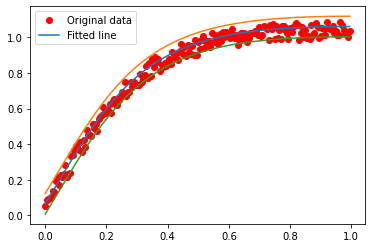

In [7]:
# Plot the graph
predicted = model(torch.from_numpy(x_train).float()).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.plot(x_train, predicted + model.h.detach().numpy())
plt.plot(x_train, predicted - model.h.detach().numpy())
plt.legend()
plt.show()

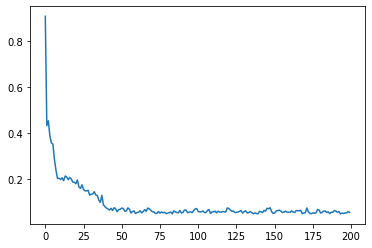

In [8]:
plt.plot(error_log)
plt.show()